In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True).frame

In [ ]:
print(california_housing.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
print(california_housing.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

First few rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Basic statistics of the dataset:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000

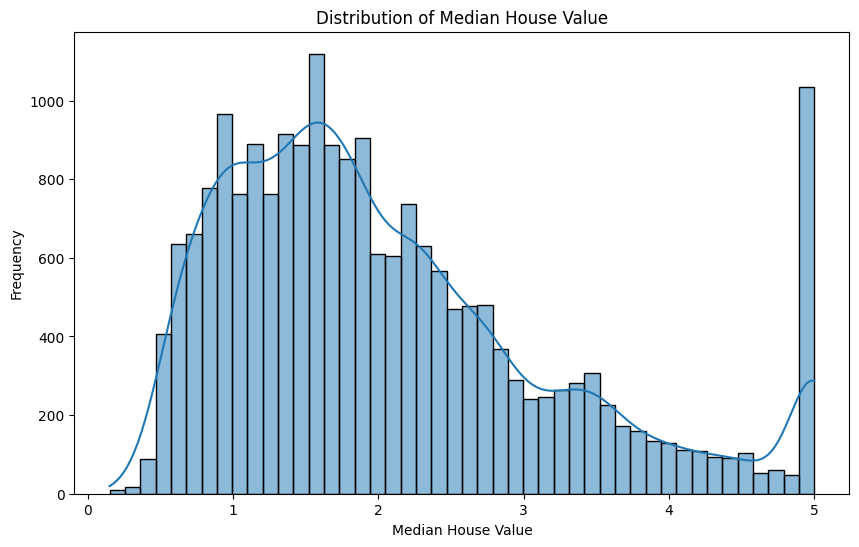

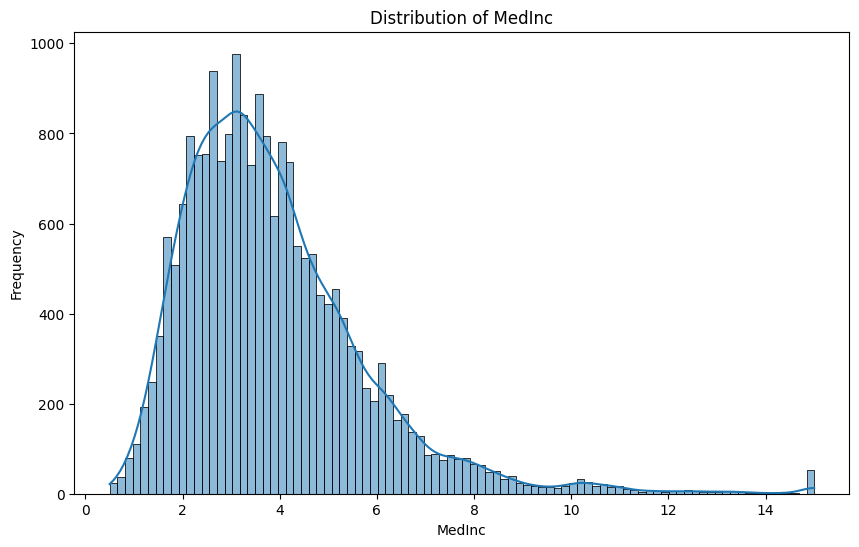

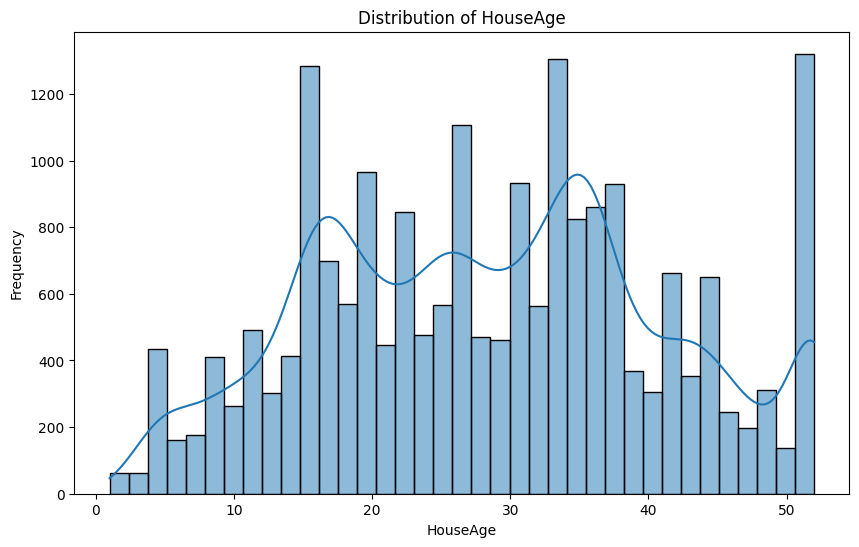

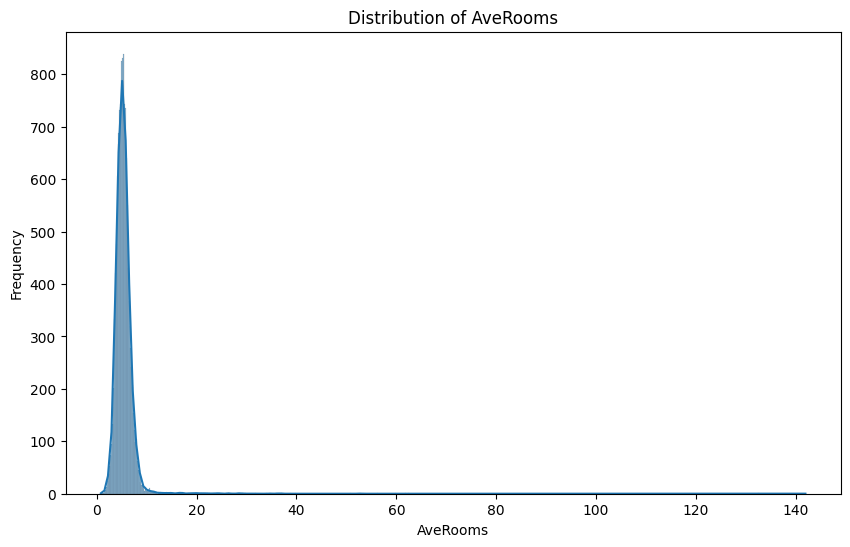

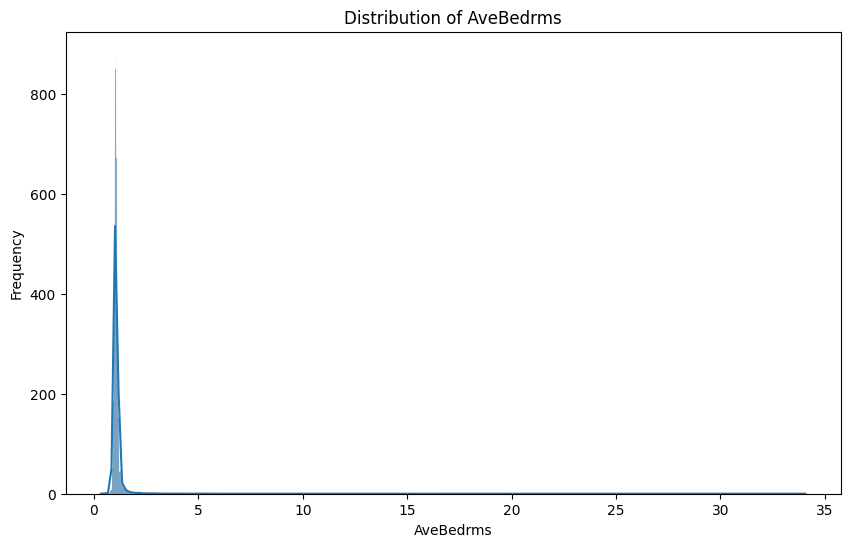

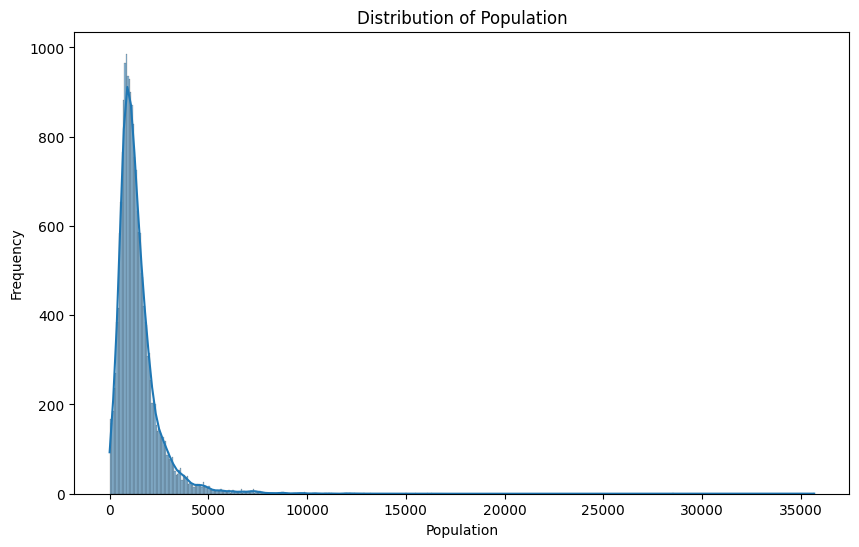

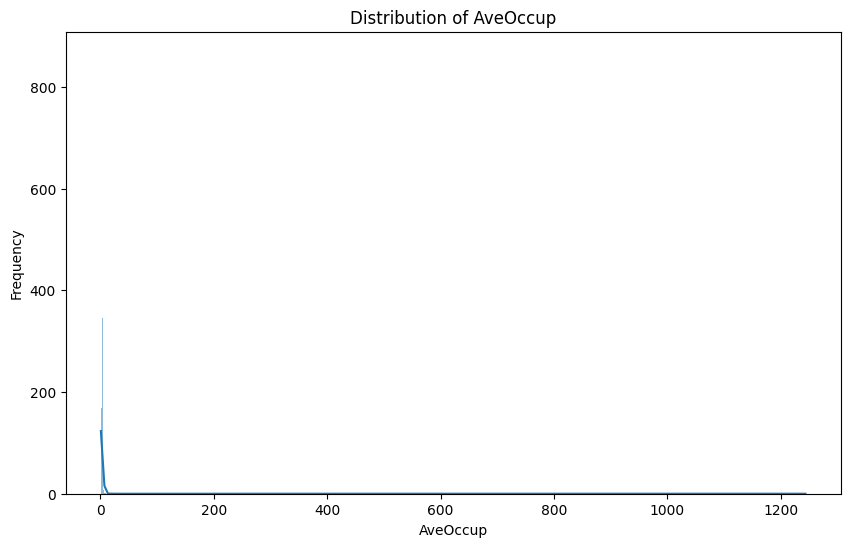

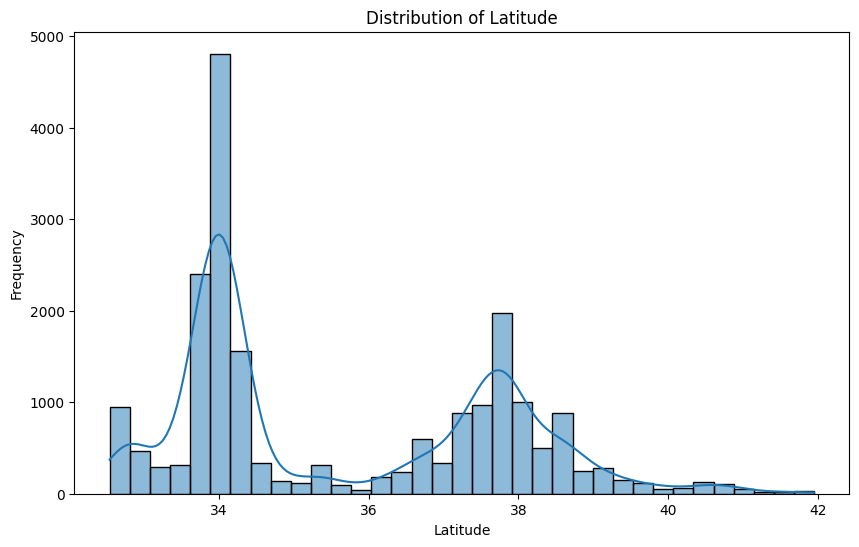

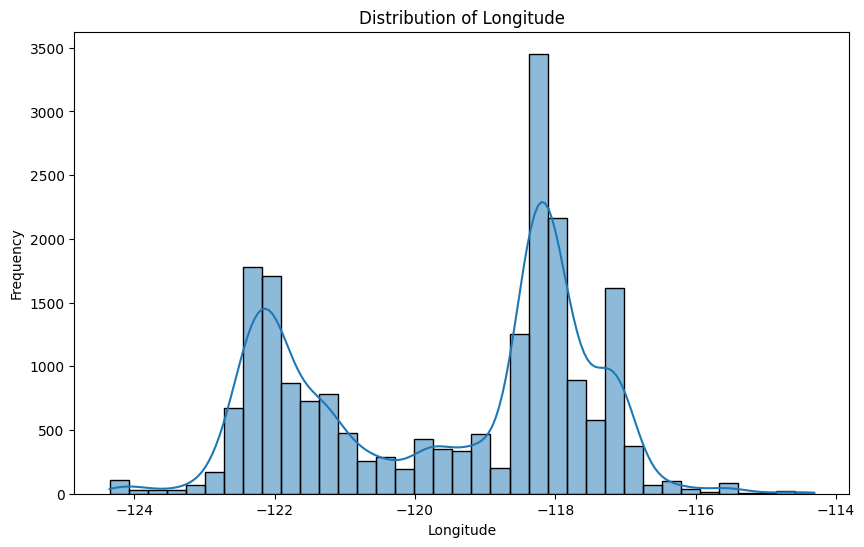

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california_housing = fetch_california_housing(as_frame=True)
data = california_housing.data
target_variable = california_housing.target

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Explore the basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(data.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(target_variable, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of each feature
features = data.columns
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Pairplot to visualize relationships between features and target variable
#data["median_house_value"] = target_variable  # Add the target variable to the DataFrame
#sns.pairplot(data)
#plt.show()


2. Linear Regression

Slope: 0.41917425259090124
Intercept: 0.44533987590549917

Mean Squared Error (Train): 0.696161732998012
Mean Squared Error (Test): 0.7210390612112957


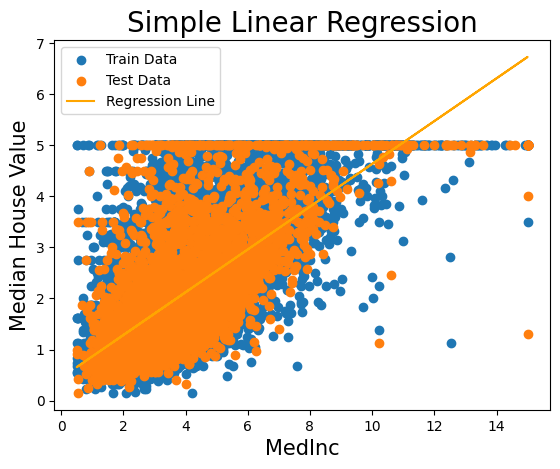

In [ ]:
feature_name = "MedInc"
x = data[feature_name]
y = target_variable
np.random.seed(42)
indices = np.arange(len(x))
np.random.shuffle(indices)
split = int(0.8 * len(x))
x_train, x_test = x.iloc[indices[:split]], x.iloc[indices[split:]]
y_train, y_test = y.iloc[indices[:split]], y.iloc[indices[split:]]


def simple_linear_regression(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    slope = np.dot(x - mean_x, y - mean_y) / np.dot(x - mean_x, x - mean_x)
    intercept = mean_y - slope * mean_x

    return slope, intercept

slope, intercept = simple_linear_regression(x_train, y_train)
y_train_pred = slope * x_train + intercept
y_test_pred = slope * x_test + intercept
mse_train = np.mean((y_train - y_train_pred)**2)
mse_test = np.mean((y_test - y_test_pred)**2)

print("Slope:", slope)
print("Intercept:", intercept)
print("\nMean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)


plt.scatter(x_train, y_train, label='Train Data')
plt.scatter(x_test, y_test, label='Test Data')
plt.plot(x_train, y_train_pred, color='orange', label='Regression Line')
plt.xlabel(feature_name, fontsize=15)
plt.ylabel('Median House Value', fontsize=15)
plt.title('Simple Linear Regression', fontsize=20)
plt.legend()
plt.show()


3. Multiple Linear Regression

Coefficients: [-3.67199934e-01  5.47689414e-01  1.59938295e-02 -2.33540671e-01
  1.01908754e+00  1.67290880e-05 -5.53139165e-03]

Mean Squared Error (Train): 0.6017724469345881
Mean Squared Error (Test): 0.665596147558761


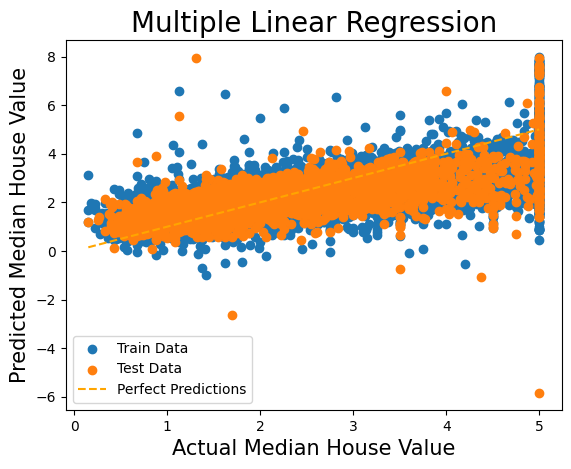

In [ ]:
feature_names = ["MedInc","HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup"]

# Selecting multiple features
X = data[feature_names]
y = target_variable
np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)
split = int(0.8 * len(X))
X_train, X_test = X.iloc[indices[:split]], X.iloc[indices[split:]]
y_train, y_test = y.iloc[indices[:split]], y.iloc[indices[split:]]


def multiple_linear_regression(X, y):
    ones_column = np.ones((len(X), 1))
    X = np.column_stack((ones_column, X))  # Adding a column of ones for the intercept term

    # Calculating coefficients using the normal equation
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    return coefficients


coefficients = multiple_linear_regression(X_train, y_train)

# Making predictions on the training and test sets
X_train_with_intercept = np.column_stack((np.ones((len(X_train), 1)), X_train))
X_test_with_intercept = np.column_stack((np.ones((len(X_test), 1)), X_test))

y_train_pred = X_train_with_intercept @ coefficients
y_test_pred = X_test_with_intercept @ coefficients

# Calculating Mean Squared Error
mse_train = np.mean((y_train - y_train_pred)**2)
mse_test = np.mean((y_test - y_test_pred)**2)

print("Coefficients:", coefficients)
print("\nMean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)


# Plotting
plt.scatter(y_train, y_train_pred, label='Train Data')
plt.scatter(y_test, y_test_pred, label='Test Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='orange', linestyle='--', label='Perfect Predictions')
plt.xlabel('Actual Median House Value', fontsize=15)
plt.ylabel('Predicted Median House Value', fontsize=15)
plt.title('Multiple Linear Regression', fontsize=20)
plt.legend()
plt.show()


4. Locally Weighted Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def gaussian_kernel(distance, tau):
    return np.exp(-(distance ** 2) / (2 * (tau ** 2)))

def locally_weighted_linear_regression(prediction_point, X, y, kernel, tau, lambda_reg=1e-5):
    """
    Locally Weighted Linear Regression with Regularization

    Parameters:
    - prediction_point: The point for which we want to make a prediction (numpy array).
    - X: Feature matrix of the dataset.
    - y: Target variable of the dataset.
    - kernel: Kernel function used to calculate weights.
    - tau: Bandwidth parameter in the kernel function.
    - lambda_reg: Regularization parameter.

    Returns:
    - Predicted value for the given prediction point.
    """
    distances = np.linalg.norm(X - prediction_point, axis=1)
    weights = kernel(distances, tau)

    # Adding a column of ones for the intercept term
    X_with_intercept = np.column_stack((np.ones(len(X)), X))

    # Calculating locally weighted coefficients using regularized weighted linear regression
    W = np.diag(weights)
    theta = np.linalg.inv(X_with_intercept.T @ W @ X_with_intercept + lambda_reg * np.eye(X_with_intercept.shape[1])) @ X_with_intercept.T @ W @ y

    # Predicting the target variable for the given prediction point
    prediction_point_with_intercept = np.insert(prediction_point, 0, 1)
    prediction = prediction_point_with_intercept @ theta

    return prediction



# Evaluate the model using mean squared error
y_test_pred = np.apply_along_axis(locally_weighted_linear_regression, 1, X_test, X_train, y_train, gaussian_kernel, tau)
mse = mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error on Test Set: {mse}")

# You can further analyze the model's performance and tune hyperparameters as needed.


Mean Squared Error on Test Set: 5.585881692625756
